In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = []

phimuls = [-2.0, -1.0, -0.5, -0.25, 0, 0.5, int(1)]
for phi_mul in phimuls:
    f = open(f"./outputs/TS_wmod1_500_bins_30_psrs_{phi_mul}_phi_fac.txt", 'r')
    temp.append(f.read().split('\n'))

In [3]:
tsmax = []
small_f = []
phio = []
phio_const = [(10**i) * 4.98e-27 for i in phimuls]  #[4.98e-29, 4.98e-28, 10**-0.75 * 4.98e-27, 10**-0.5 * 4.98e-27, 4.98e-27, 10**0.5 * 4.98e-27, 4.98e-26]
phio_const_norm = [i /4.98e-27 for i in phio_const]
for i in temp:
    tsmax.append(float(i[0]))
    small_f.append(float(i[1]))
    phio.append(float(i[2]))

In [22]:
np.sqrt(tsmax)

array([1.10809648e-05, 1.62794562e+01, 3.50496667e+01, 4.40702667e+01,
       5.86274647e+01, 6.99988154e+01, 7.56502470e+01])

In [86]:
phio_const

array([4.98000000e-20, 4.98000000e-19, 1.57481427e-18, 2.80045980e-18,
       4.98000000e-18, 1.57481427e-17, 4.98000000e-17])

In [31]:
np.sqrt(tsmax[1])

16.27945620550535

In [5]:
phio_const = np.array(phio_const)/(1e-9)

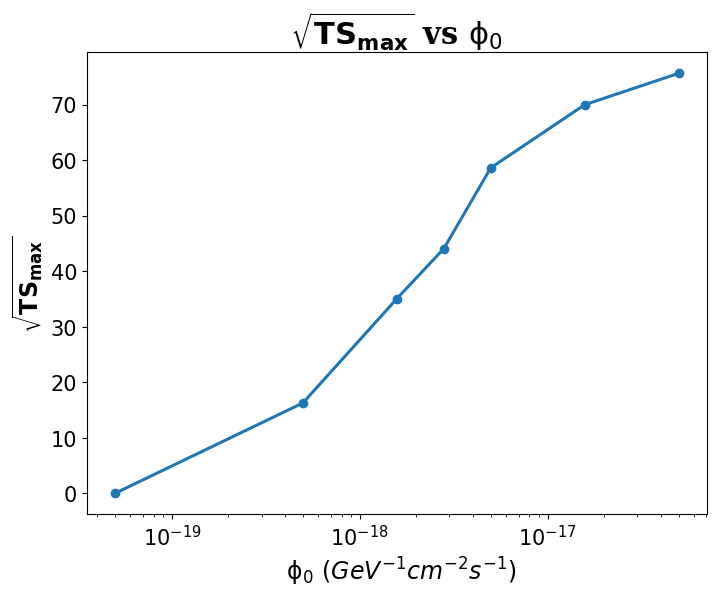

In [94]:
plt.figure(figsize=(8, 6))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }
font = {'family': 'serif',
        'size': 22,
        'weight': 'bold',
        'color':  'black',
        }


plt.plot(phio_const, np.sqrt(tsmax), lw=2.2, ls='-')
# plt.hlines(5, 1e-20, 1e-18, colors='k', linestyles='dashed', lw=2.2)
plt.scatter(phio_const, np.sqrt(tsmax))
# plt.plot(small_f, tsmax)
# plt.xlim(4.98e-27)
plt.ylabel('$\mathbf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel(' $\mathsf{\phi_0}$ $(GeV^{-1} cm^{-2} s^{-1})$', fontdict=axesfont)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.title('$\mathbf{\sqrt{TS_{max}}}$ vs $\mathsf{\phi_0}$', fontdict=font)
plt.savefig('./outputs/TSmax_phio_const.pdf', facecolor='w')
plt.show()


In [92]:
phio_const

array([4.98000000e-20, 4.98000000e-19, 1.57481427e-18, 2.80045980e-18,
       4.98000000e-18, 1.57481427e-17, 4.98000000e-17])

In [93]:
tsmax

[1.2278777994366921e-10,
 265.02069434696665,
 1228.47913232511,
 1942.188408975706,
 3437.1796192748006,
 4899.83415696011,
 5722.959872915711]

/tmp/ipykernel_35685/1178046136.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


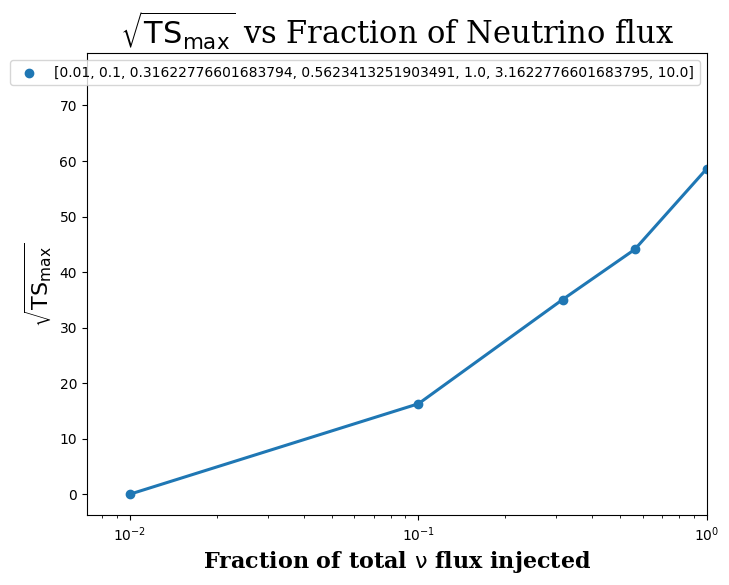

In [41]:
plt.figure(figsize=(8, 6))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
font = {'family': 'serif',
        'size': 22,
        'color':  'black',
        }
plt.plot(phio_const_norm, np.sqrt(tsmax), lw=2.2)
plt.scatter(phio_const_norm, np.sqrt(tsmax), label=phio_const_norm)
# plt.plot(small_f, np.array(tsmax), lw=2.2)
plt.xscale('log')
plt.xlim(0, 1)
plt.ylabel('$\mathsf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel('Fraction of total $\mathsf{\u03BD}$ flux injected', fontdict=axesfont)
plt.title('$\mathsf{\sqrt{TS_{max}}}$ vs Fraction of Neutrino flux', fontdict=font)
plt.savefig('./outputs/TSmax_small_f.pdf', facecolor='w')
plt.legend()
plt.show()


In [33]:
from core.req_arrays import *
from core.signal_bag import hvovec

In [53]:
msra = msra[np.abs(msdec) < 85]
msdec = msdec[np.abs(msdec) < 85]

In [54]:
len(msra[msra < 150])

489

In [55]:
np.roll(msra, -1)[:-1]

array([  1.52      ,   1.75708333,   2.89166667, ..., 358.96370208,
       358.95258333, 358.9575    ])

In [56]:
angles_less_than_5 = []
lens = 0
for i in range(len(msra)):
    # for j in range(i+1, len(msra)):
        temp = np.abs(hvovec(msra[i], msdec[i], np.roll(msra, -i)[:-i], np.roll(msdec, -i)[:-i]))
        temp2 = len(temp[temp <= 5])
        lens += temp2
        angles_less_than_5.append(temp[temp <= 5])
        

In [57]:
lens

116655

In [60]:
3387 * 3386 /2

5734191.0

In [59]:
len(msra)

3387